In [1]:
import numpy as np
from scipy.linalg import circulant,schur
import matplotlib.pyplot as plt

# Construct a One-Population Network on Ring Linearized Matrix

In [2]:
N = 500
L = 180
S = 15

xs = np.arange(N)*L/N
xs[xs > L/2] = L - xs[xs > L/2]

In [3]:
K = circulant(np.exp(-0.5*xs**2/S**2)/(np.sqrt(2*np.pi)*S)*L/N)
D = np.diag(np.roll(np.exp(-0.5*xs**2/S**2),N//2))
M = K@D

# Analyze the Eigendecomposition of the Ring Linearized Matrix

In [4]:
evals,evecs = np.linalg.eig(M)
sort_idx = np.argsort(evals)[::-1]
evals = evals[sort_idx]
evecs = evecs[:,sort_idx]
evecs = evecs*np.sign(evecs[N//2+1,:])[None,:]

Text(0.5, 1.0, 'Odd Eigenvectors')

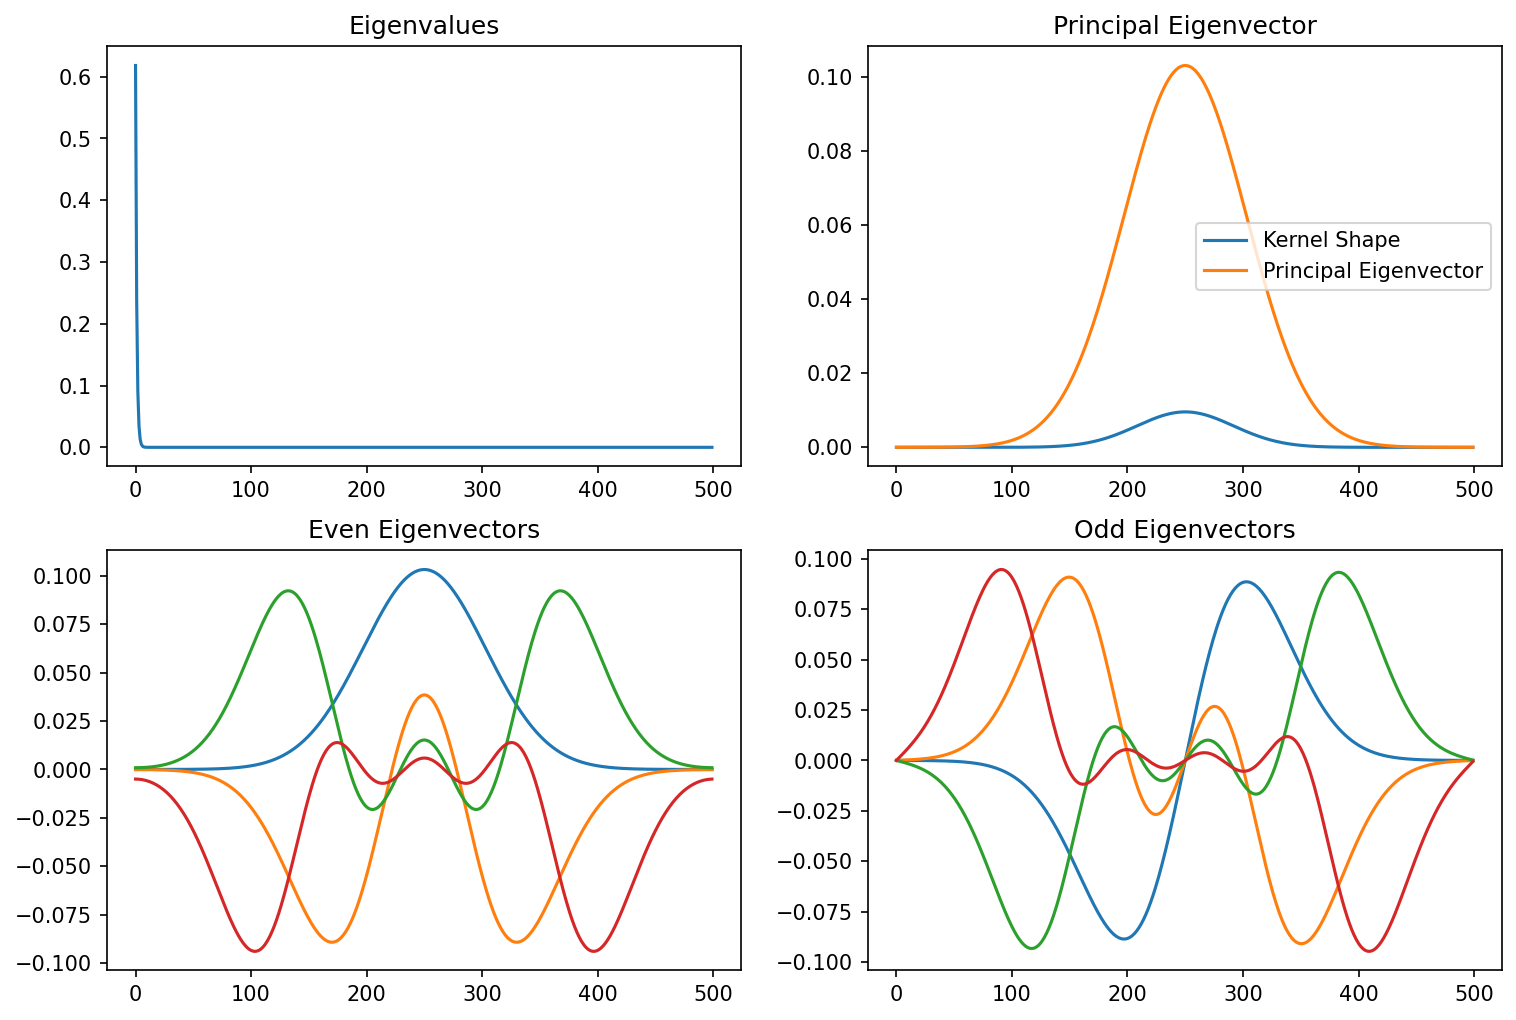

In [5]:
fig,axs = plt.subplots(2,2,figsize=(12,8),dpi=150)

axs[0,0].plot(evals)

axs[0,1].plot(np.roll(np.exp(-0.5*xs**2/S**2)/(np.sqrt(2*np.pi)*S)*L/N,N//2),label='Kernel Shape')
axs[0,1].plot(evecs[:,0],label='Principal Eigenvector')
axs[0,1].legend()

for i in range(4):
    axs[1,0].plot(evecs[:,0+2*i])
    axs[1,1].plot(evecs[:,1+2*i])
    
axs[0,0].set_title('Eigenvalues')
axs[0,1].set_title('Principal Eigenvector')
axs[1,0].set_title('Even Eigenvectors')
axs[1,1].set_title('Odd Eigenvectors')

# Analyze the Schur Decomposition of the Ring Linearized Matrix

In [6]:
Z,R = np.linalg.qr(evecs)
T = R@np.diag(evals)@np.linalg.inv(R)
Z = Z@np.diag(np.sign(Z[N//2+1,:]))
T = np.diag(np.sign(Z[N//2+1,:]))@T@np.diag(np.sign(Z[N//2+1,:]))

Text(0.5, 1.0, 'Odd Schur Modes')

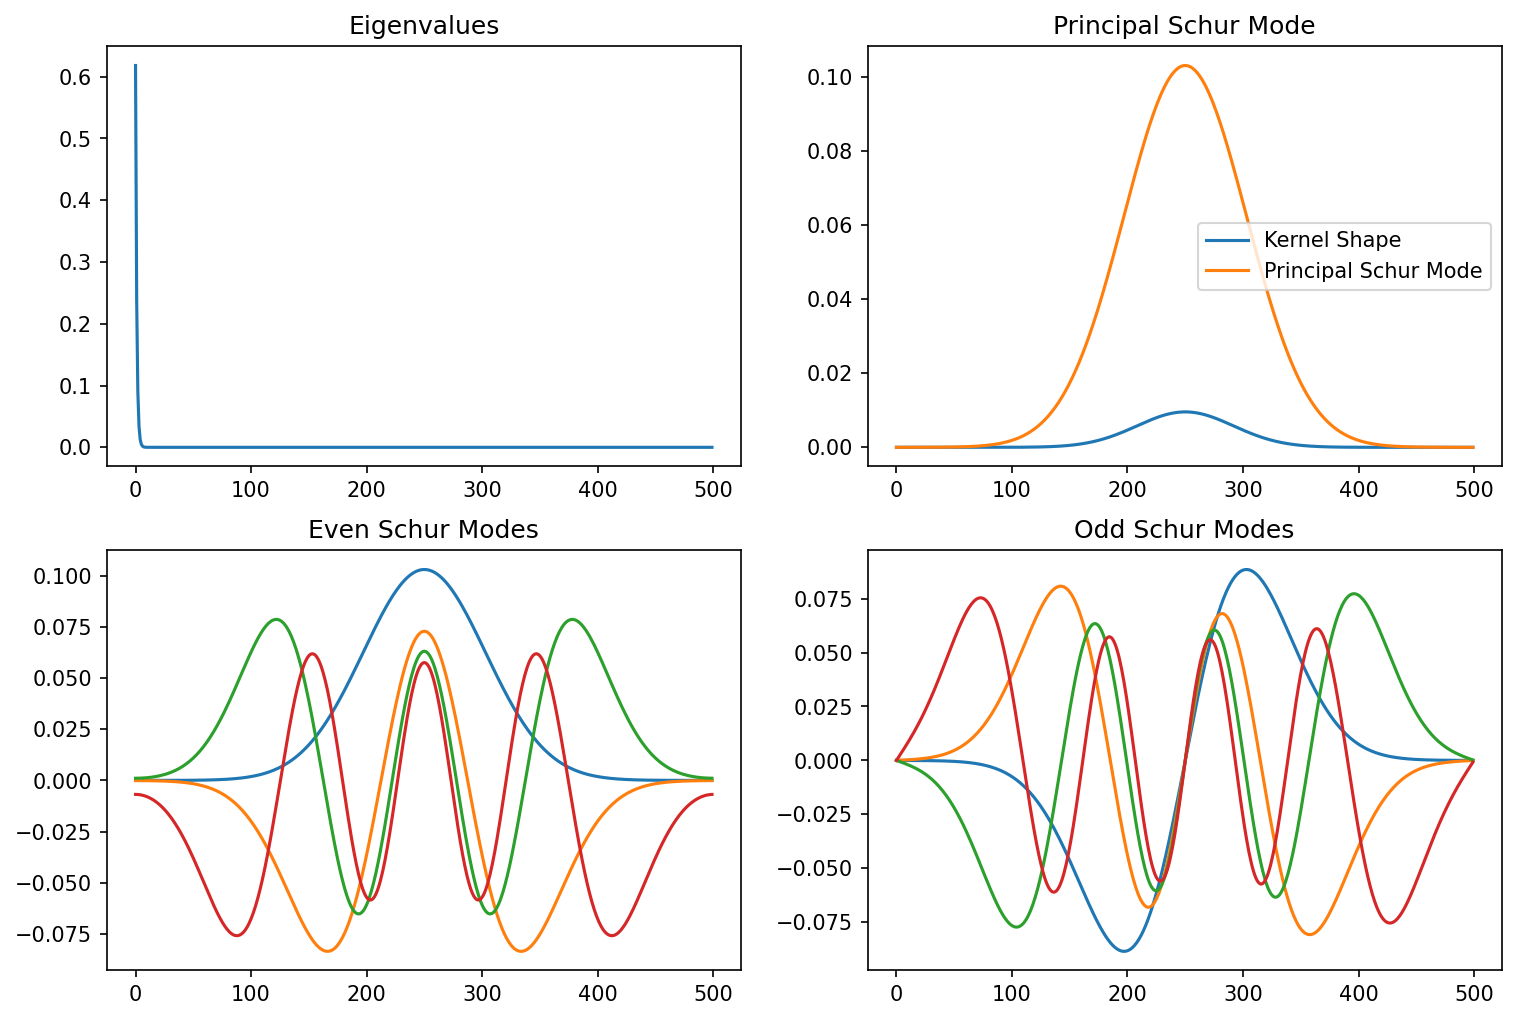

In [7]:
fig,axs = plt.subplots(2,2,figsize=(12,8),dpi=150)

axs[0,0].plot(np.diag(T))

axs[0,1].plot(np.roll(np.exp(-0.5*xs**2/S**2)/(np.sqrt(2*np.pi)*S)*L/N,N//2),label='Kernel Shape')
axs[0,1].plot(Z[:,0],label='Principal Schur Mode')
axs[0,1].legend()

for i in range(4):
    axs[1,0].plot(Z[:,0+2*i])
    axs[1,1].plot(Z[:,1+2*i])
    
axs[0,0].set_title('Eigenvalues')
axs[0,1].set_title('Principal Schur Mode')
axs[1,0].set_title('Even Schur Modes')
axs[1,1].set_title('Odd Schur Modes')

Text(0.5, 1.0, 'Schur Matrix')

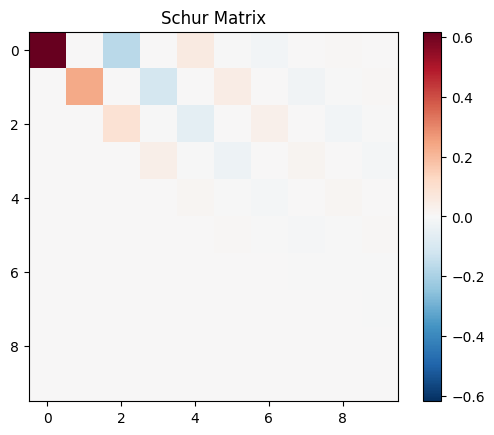

In [8]:
plt.imshow(T[:10,:10],cmap='RdBu_r',vmin=-np.max(np.abs(T)),vmax=np.max(np.abs(T)))
plt.colorbar()
plt.title('Schur Matrix')

# Add Disorder to Schur Matrix, Look at Eigenvalues

In [9]:
sigmas = np.arange(5+1)/10
N_repl = 50
disord_evals = np.zeros((len(sigmas),N_repl*N),np.complex64)

for repl_idx in range(N_repl):
    J = np.random.default_rng(repl_idx).normal(size=(N,N))
    
    for sigma_idx,sigma in enumerate(sigmas):
        A = T + sigma/np.sqrt(N)*J
        A_evals,_ = np.linalg.eig(A)
        disord_evals[sigma_idx,repl_idx*N:(repl_idx+1)*N] = A_evals

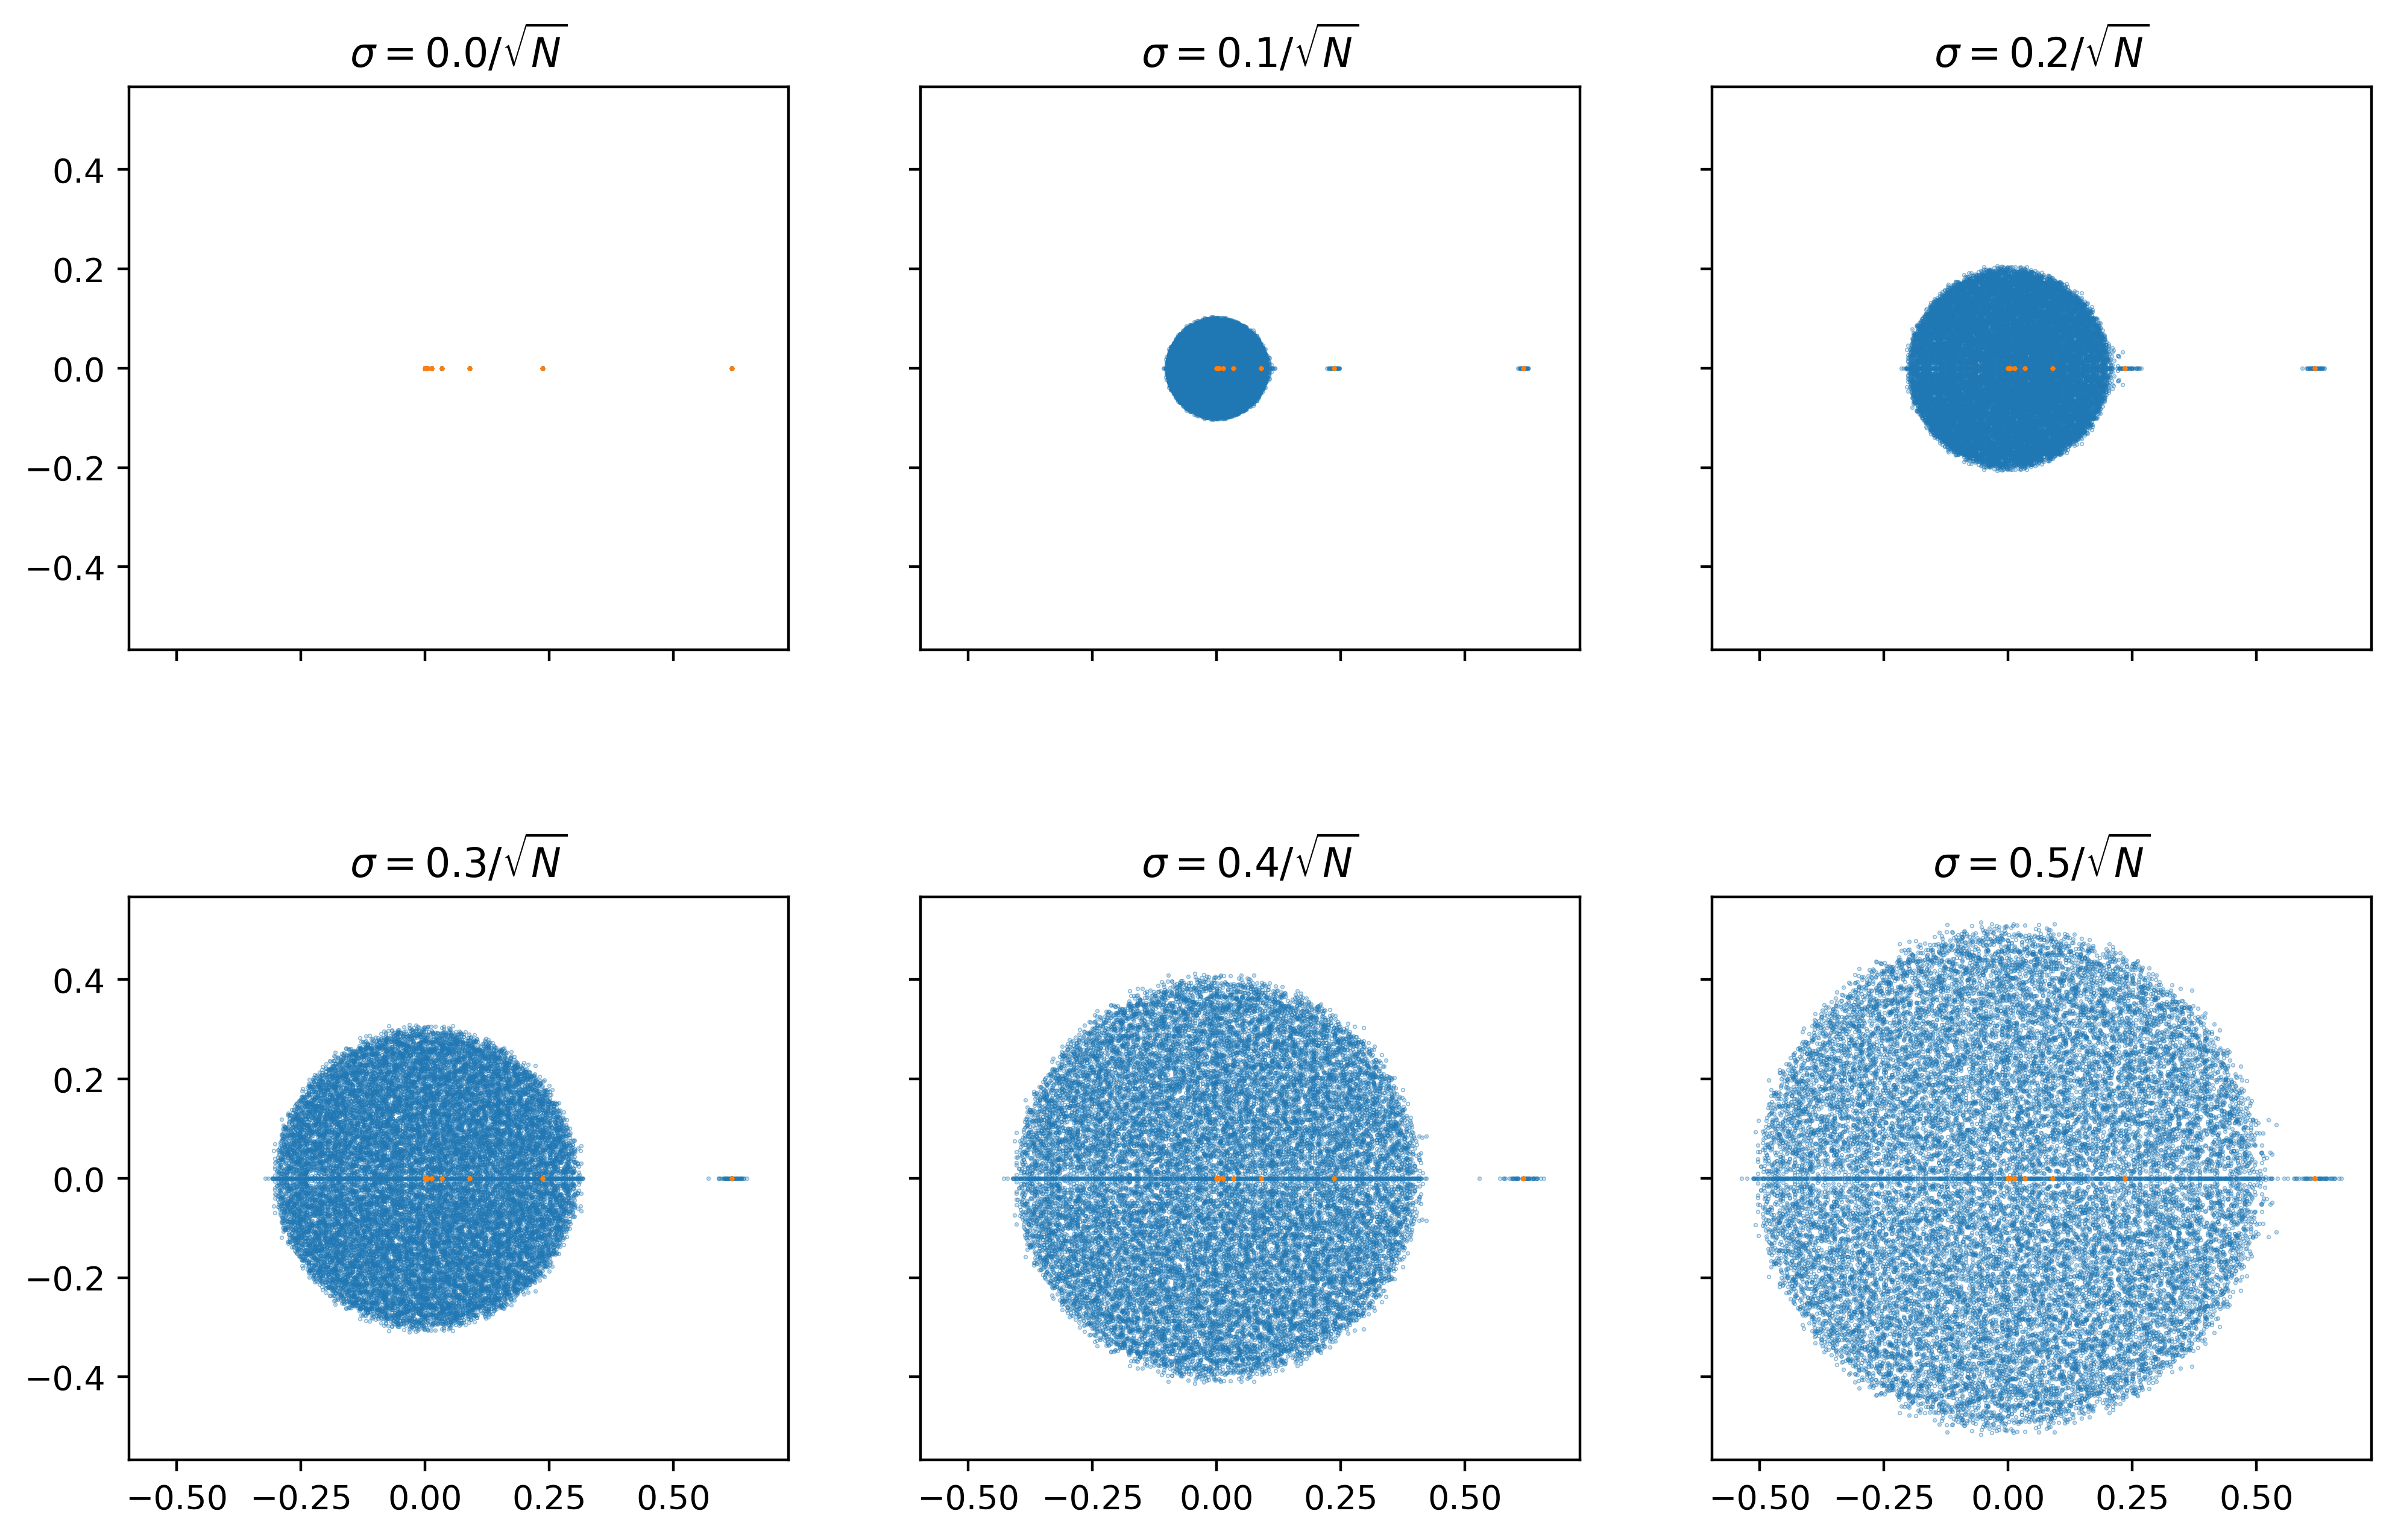

In [10]:
fig,axs = plt.subplots(2,3,figsize=(12,8),dpi=400,sharex=True,sharey=True)
axs = axs.ravel()

for sigma_idx,sigma in enumerate(sigmas):
    axs[sigma_idx].scatter(np.real(disord_evals[sigma_idx]),np.imag(disord_evals[sigma_idx]),s=0.1,alpha=0.5)
    axs[sigma_idx].scatter(np.real(disord_evals[0]),np.imag(disord_evals[0]),s=0.1)
    axs[sigma_idx].set_aspect('equal')
    axs[sigma_idx].set_title(r'$\sigma = '+'{:.1f}'.format(sigma)+r'/\sqrt{N}$')

# Add Gain Modulated Disorder, Look at Eigenvalues

In [11]:
sigmas = np.arange(5+1)/10
N_repl = 50
disord_evals = np.zeros((len(sigmas),N_repl*N),np.complex64)

for repl_idx in range(N_repl):
    J = np.random.default_rng(repl_idx).normal(size=(N,N))
    
    for sigma_idx,sigma in enumerate(sigmas):
        A = T + sigma/np.sqrt(N)*J@D
        A_evals,_ = np.linalg.eig(A)
        disord_evals[sigma_idx,repl_idx*N:(repl_idx+1)*N] = A_evals

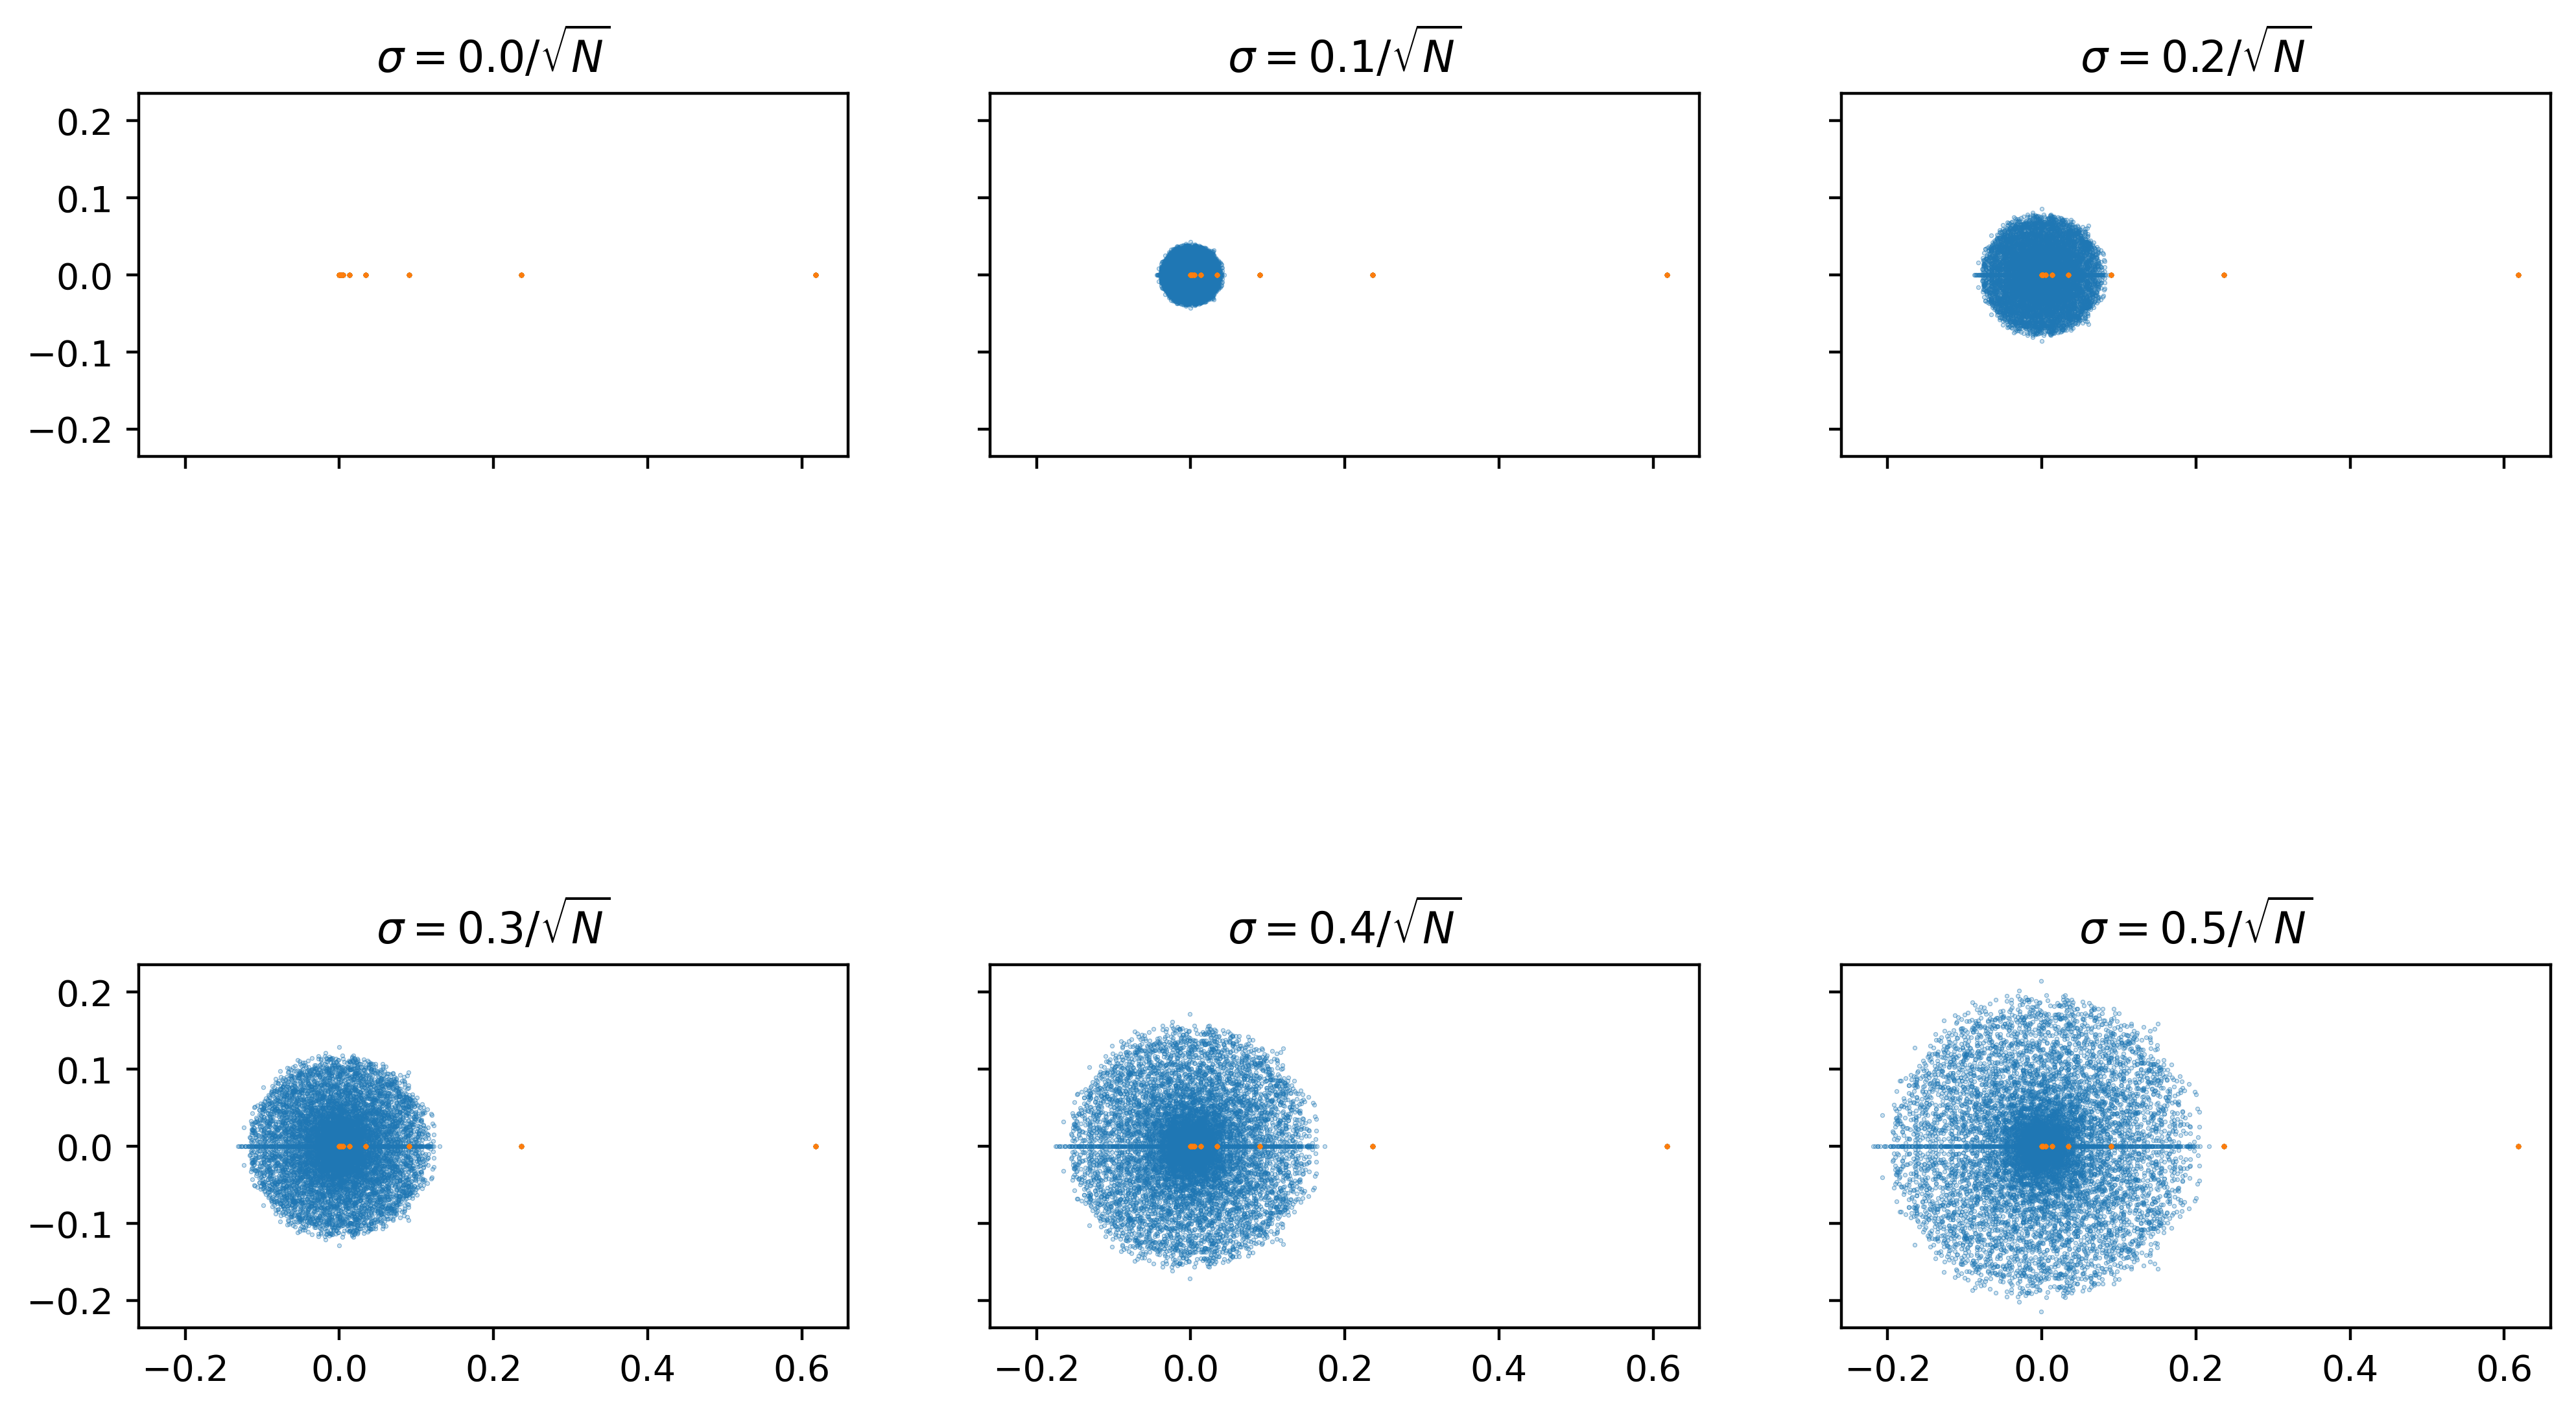

In [12]:
fig,axs = plt.subplots(2,3,figsize=(12,8),dpi=400,sharex=True,sharey=True)
axs = axs.ravel()

for sigma_idx,sigma in enumerate(sigmas):
    axs[sigma_idx].scatter(np.real(disord_evals[sigma_idx]),np.imag(disord_evals[sigma_idx]),s=0.1,alpha=0.5)
    axs[sigma_idx].scatter(np.real(disord_evals[0]),np.imag(disord_evals[0]),s=0.1)
    axs[sigma_idx].set_aspect('equal')
    axs[sigma_idx].set_title(r'$\sigma = '+'{:.1f}'.format(sigma)+r'/\sqrt{N}$')

# Test Two Dimensional Case

In [13]:
W = np.array(
    [[2,-1],
     [3,-2]]
)

MW = np.kron(W,M)

In [14]:
evals,evecs = np.linalg.eig(MW)
sort_idx = np.argsort(evals)[::-1]
evals = evals[sort_idx]
evecs = evecs[:,sort_idx]
evecs = evecs*np.sign(evecs[N//2+1,:])[None,:]

In [15]:
Z,R = np.linalg.qr(evecs)
T = R@np.diag(evals)@np.linalg.inv(R)
Z = Z@np.diag(np.sign(Z[N//2+1,:]))
T = np.diag(np.sign(Z[N//2+1,:]))@T@np.diag(np.sign(Z[N//2+1,:]))

In [ ]:
sigmas = np.arange(5+1)/10
N_repl = 25
disord_evals = np.zeros((len(sigmas),2*N_repl*N),np.complex64)

for repl_idx in range(N_repl):
    J = np.random.default_rng(repl_idx).normal(size=(2*N,2*N))
    
    for sigma_idx,sigma in enumerate(sigmas):
        A = T + sigma/np.sqrt(2*N)*J
        A_evals,_ = np.linalg.eig(A)
        disord_evals[sigma_idx,repl_idx*2*N:(repl_idx+1)*2*N] = A_evals

In [ ]:
fig,axs = plt.subplots(2,3,figsize=(12,8),dpi=400,sharex=True,sharey=True)
axs = axs.ravel()

for sigma_idx,sigma in enumerate(sigmas):
    axs[sigma_idx].scatter(np.real(disord_evals[sigma_idx]),np.imag(disord_evals[sigma_idx]),s=0.1,alpha=0.5)
    axs[sigma_idx].scatter(np.real(disord_evals[0]),np.imag(disord_evals[0]),s=0.1)
    axs[sigma_idx].set_aspect('equal')
    axs[sigma_idx].set_title(r'$\sigma = '+'{:.1f}'.format(sigma)+r'/\sqrt{N}$')

# Add Gain Modulated Disorder, Look at Eigenvalues

In [ ]:
sigmas = np.arange(5+1)/10
N_repl = 25
disord_evals = np.zeros((len(sigmas),2*N_repl*N),np.complex64)

for repl_idx in range(N_repl):
    J = np.random.default_rng(repl_idx).normal(size=(2*N,2*N))@np.kron(W,D)
    
    for sigma_idx,sigma in enumerate(sigmas):
        A = T + sigma/np.sqrt(2*N)*J
        A_evals,_ = np.linalg.eig(A)
        disord_evals[sigma_idx,repl_idx*2*N:(repl_idx+1)*2*N] = A_evals

In [ ]:
fig,axs = plt.subplots(2,3,figsize=(12,8),dpi=400,sharex=True,sharey=True)
axs = axs.ravel()

for sigma_idx,sigma in enumerate(sigmas):
    axs[sigma_idx].scatter(np.real(disord_evals[sigma_idx]),np.imag(disord_evals[sigma_idx]),s=0.1,alpha=0.5)
    axs[sigma_idx].scatter(np.real(disord_evals[0]),np.imag(disord_evals[0]),s=0.1)
    axs[sigma_idx].set_aspect('equal')
    axs[sigma_idx].set_title(r'$\sigma = '+'{:.1f}'.format(sigma)+r'/\sqrt{N}$')